In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
import ultralytics
print(ultralytics.__version__)


8.0.196


In [ ]:
!pip install --upgrade ultralytics


In [ ]:
import ultralytics
print(ultralytics.__version__)

8.0.196


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="F3yC7yGwctlSMgRNrhca")
project = rf.workspace("college-if44x").project("on-tree-mature-coconut-fruit-detection")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to On-tree-mature-coconut-fruit-detection-1 in yolov8:: 100%|██████████| 548/548 [00:00<00:00, 5991.41it/s]


In [ ]:
from ultralytics import YOLO

# Load the YOLOv11 model using the path with weights_only=True if supported
model = YOLO('/content/yolov8n.pt')  # Ensure the file path is correct and trusted


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


**Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml epochs=25 imgsz=800 plots=True

['Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)',
 '\x1b\x1bengine/trainer: \x1btask=detect, mode=train, model=yolo11s.pt, data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

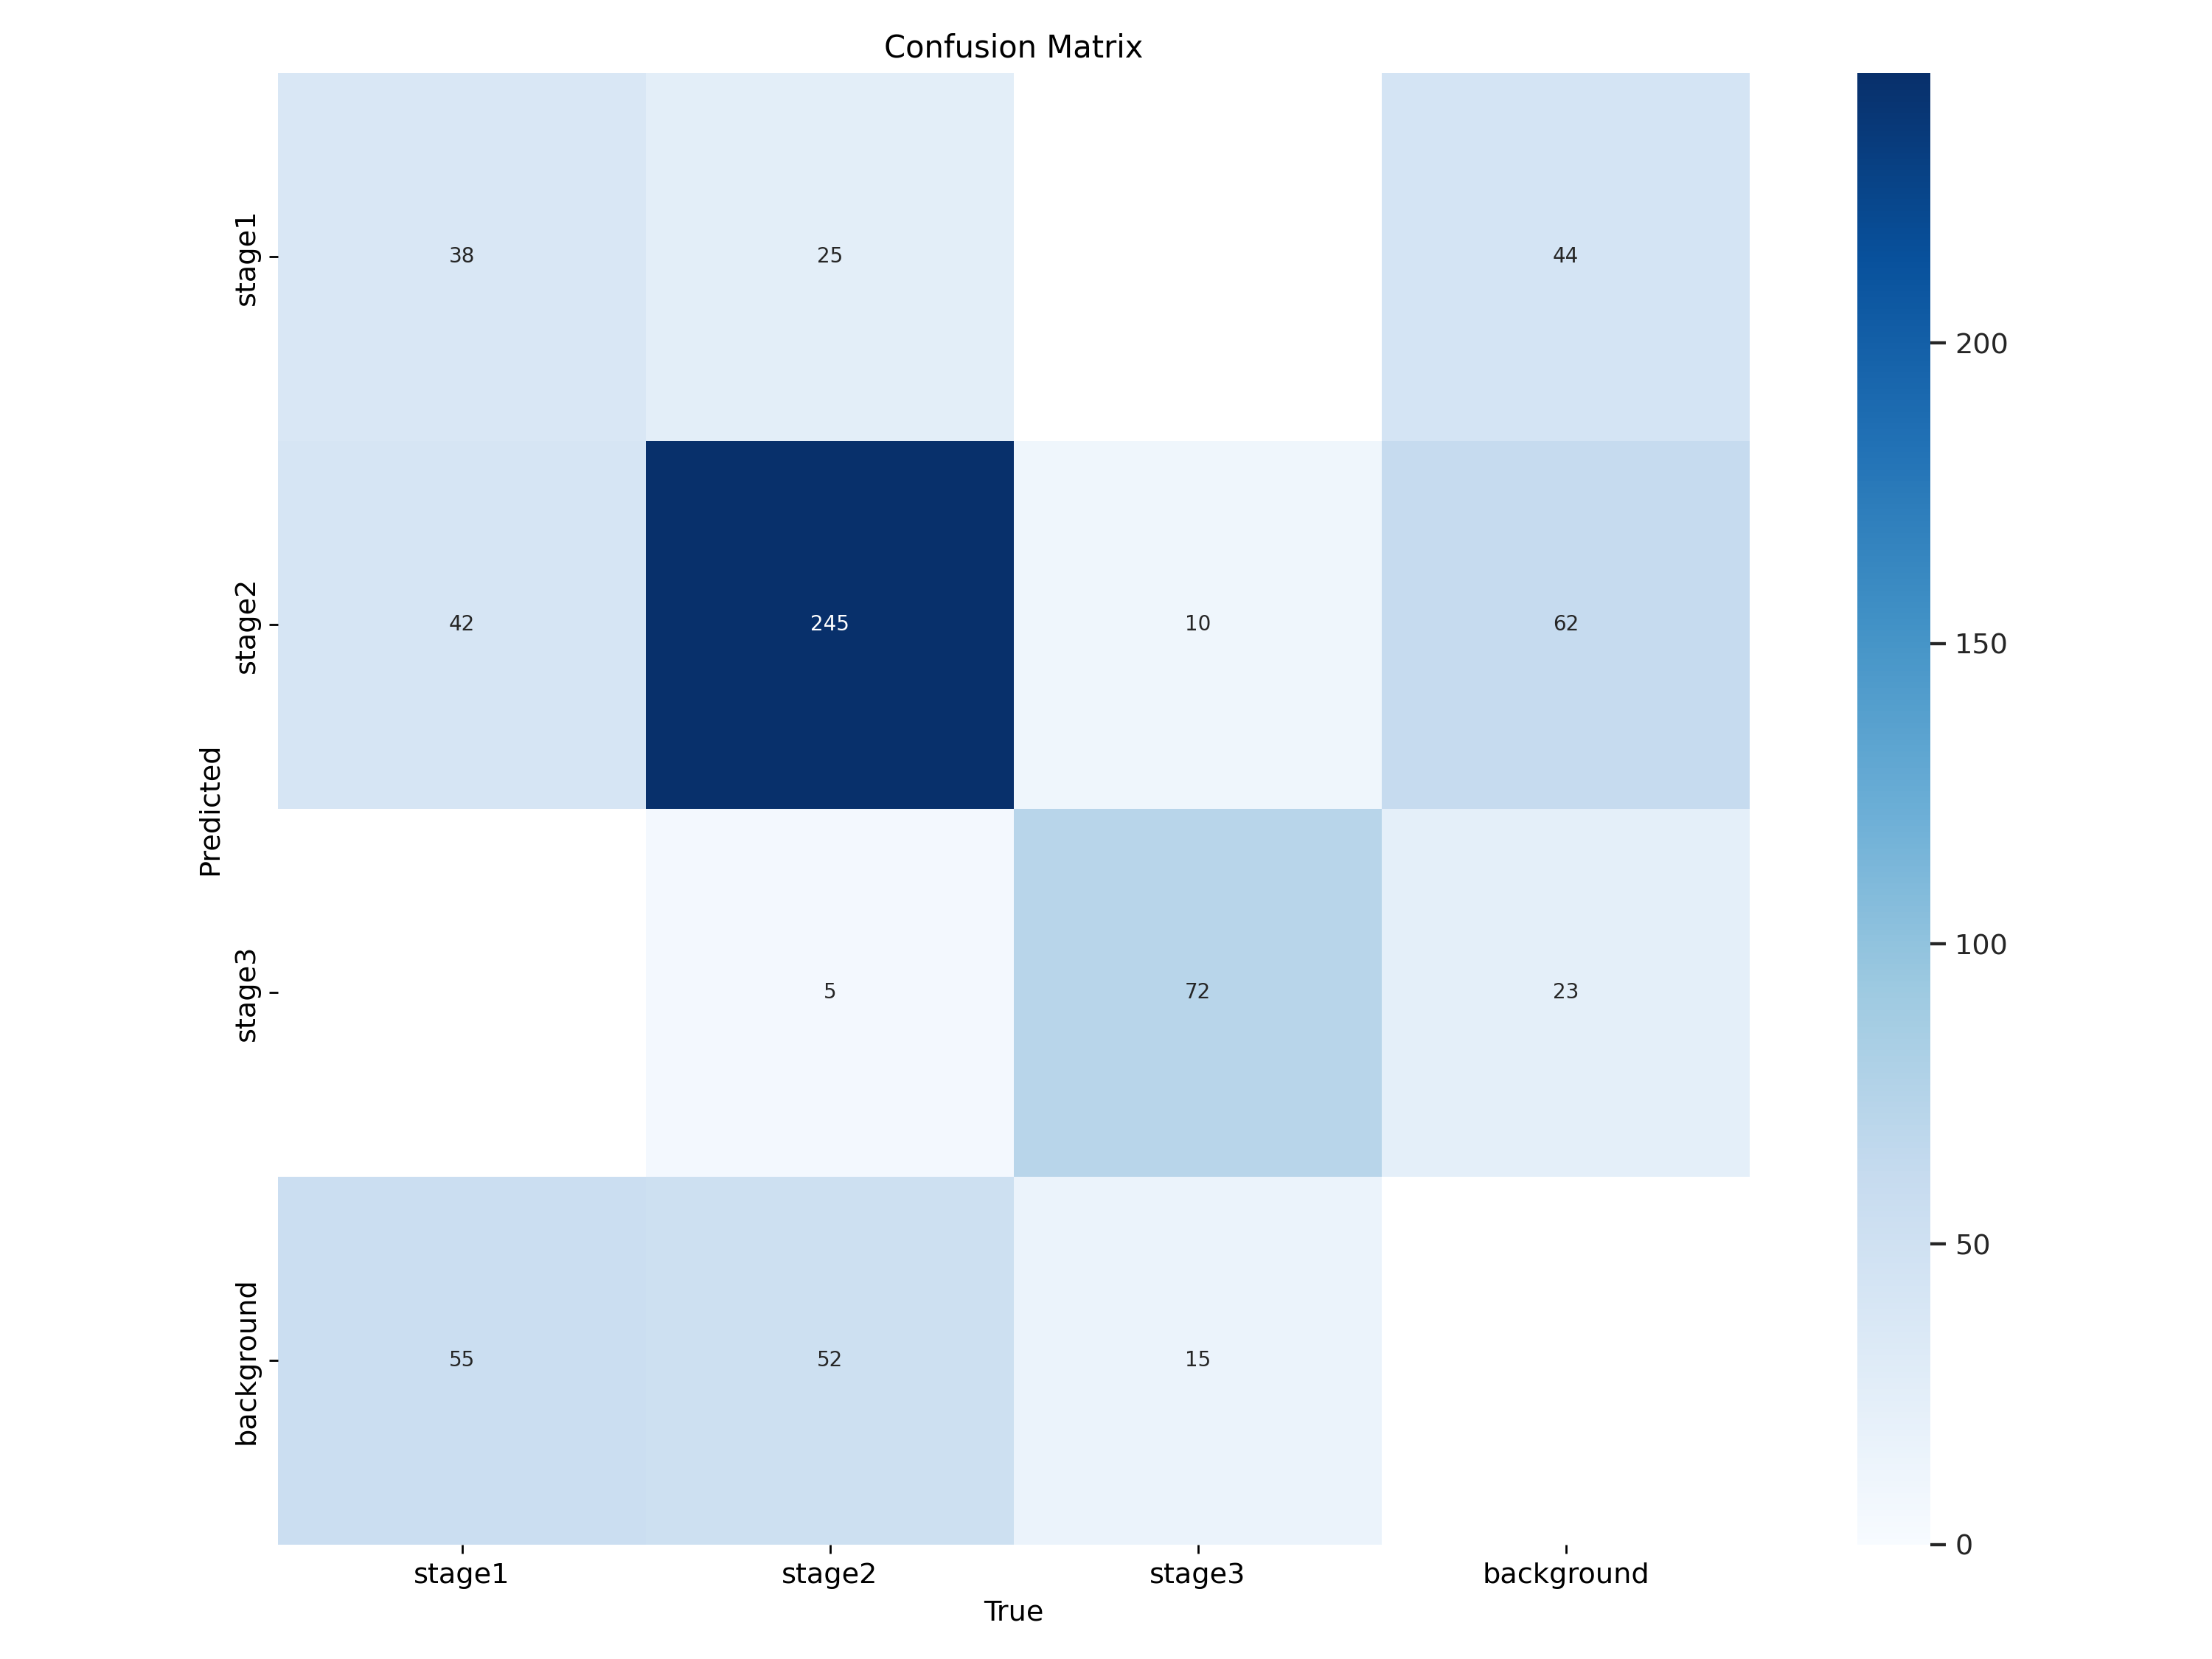

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

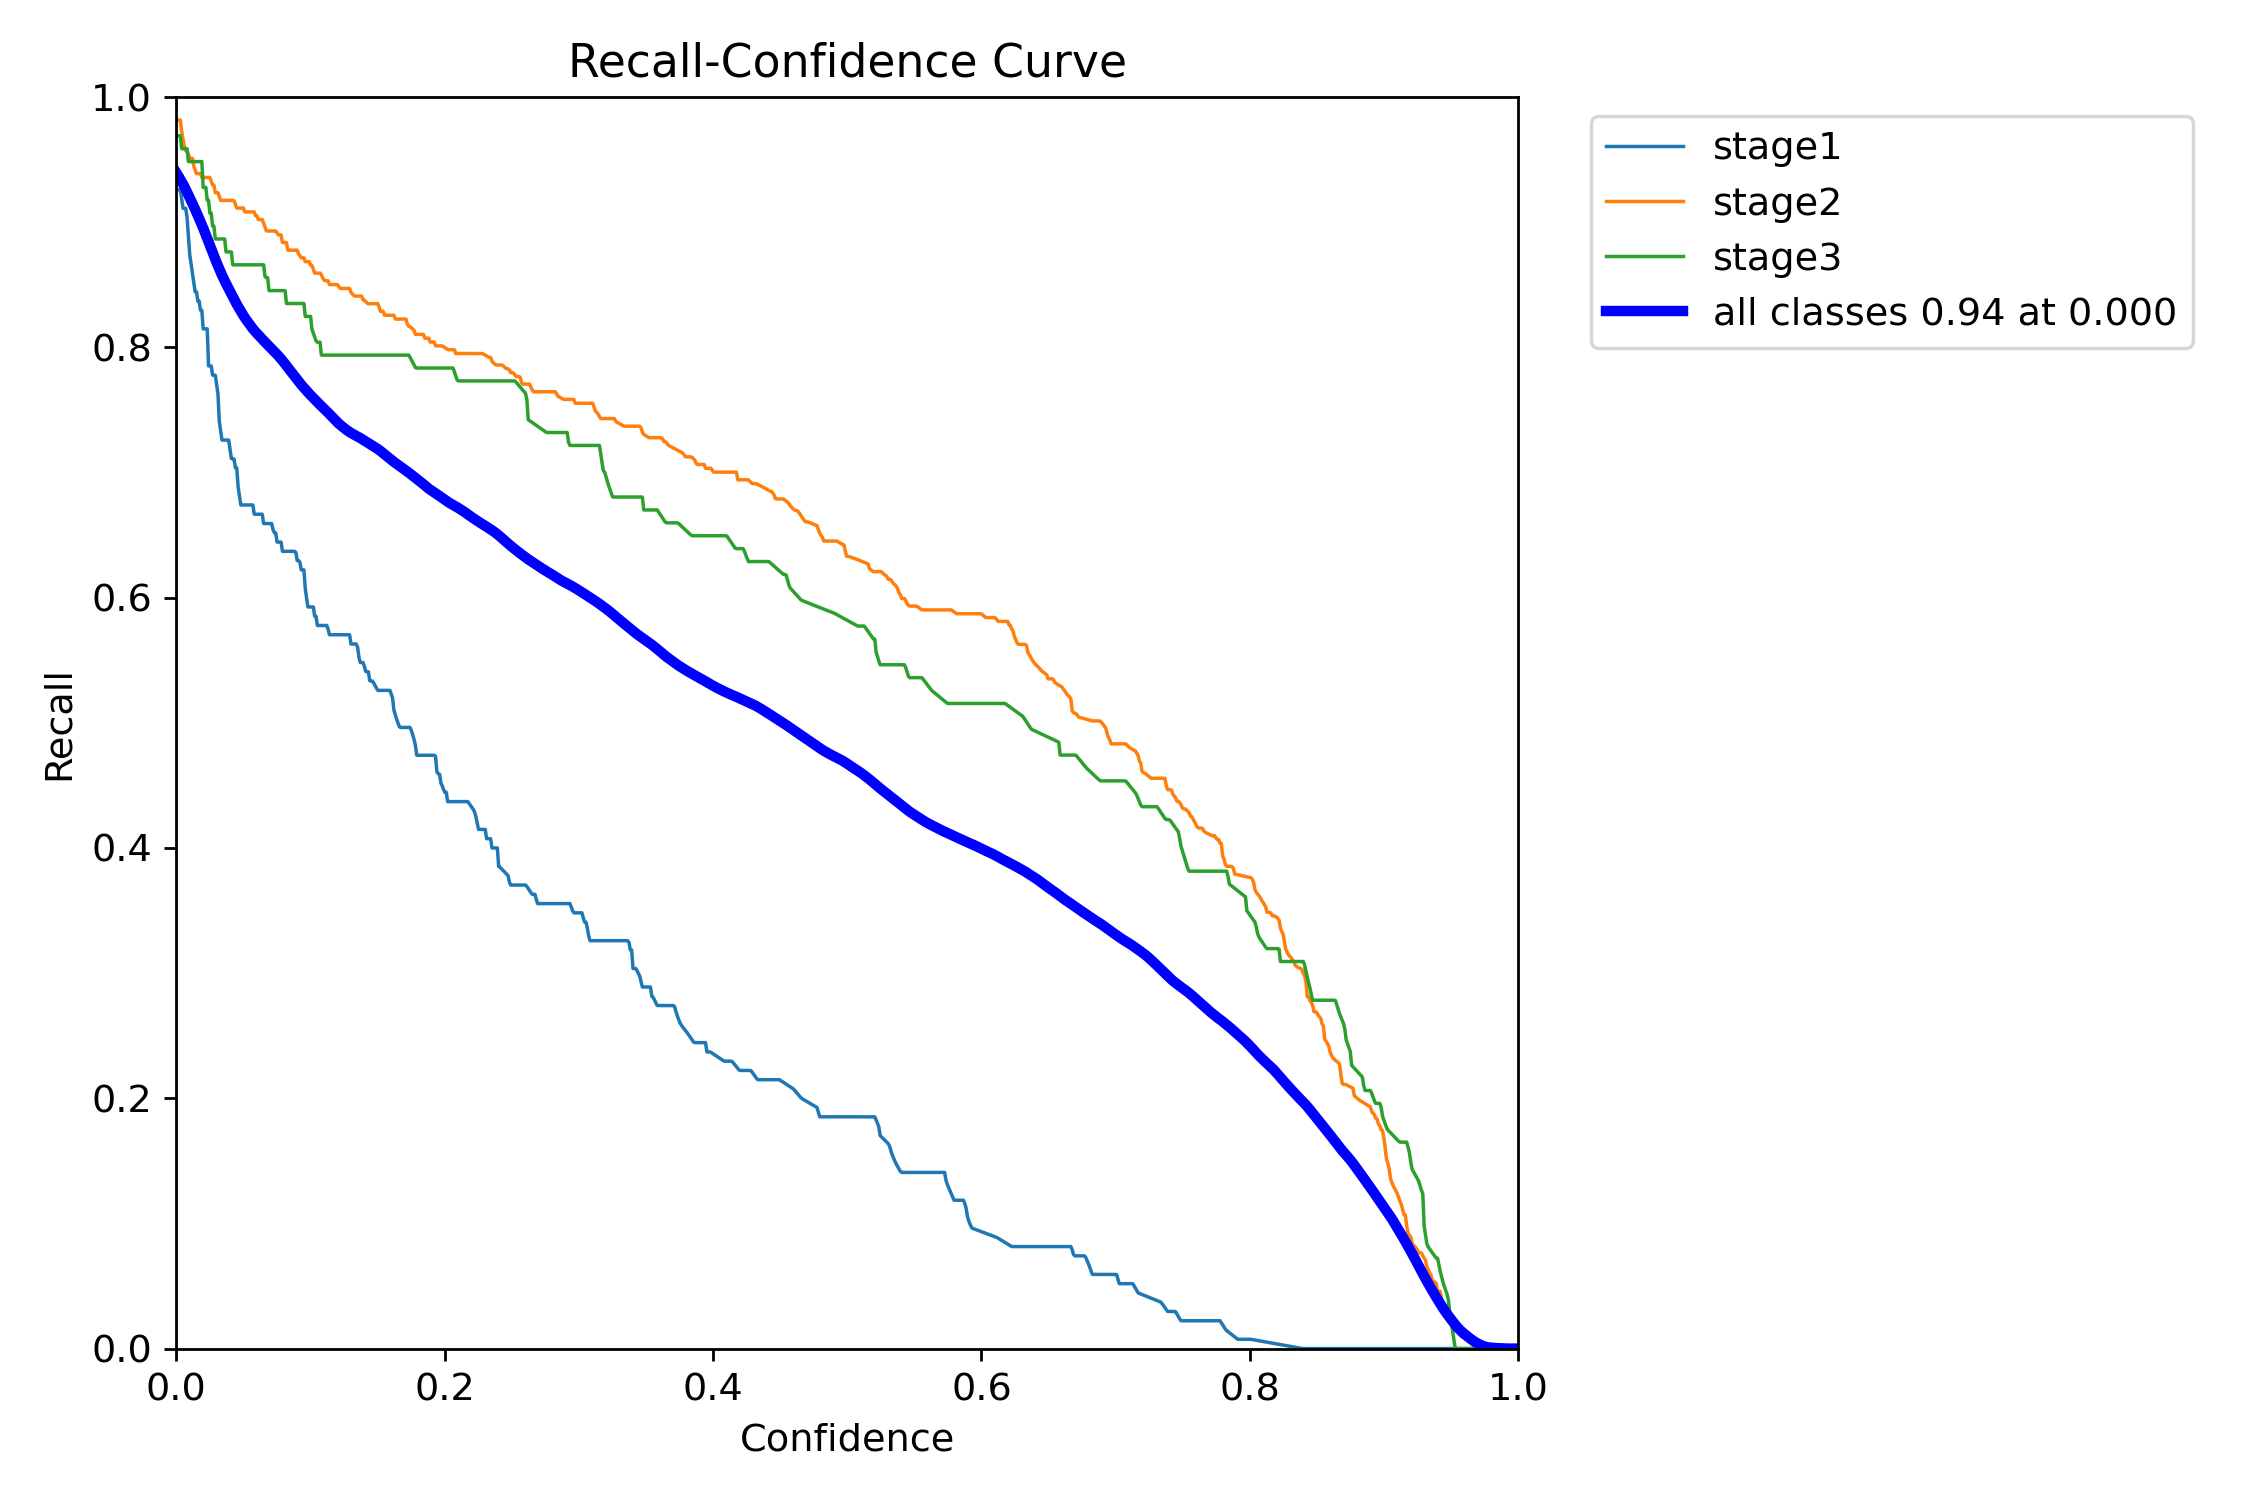

In [ ]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

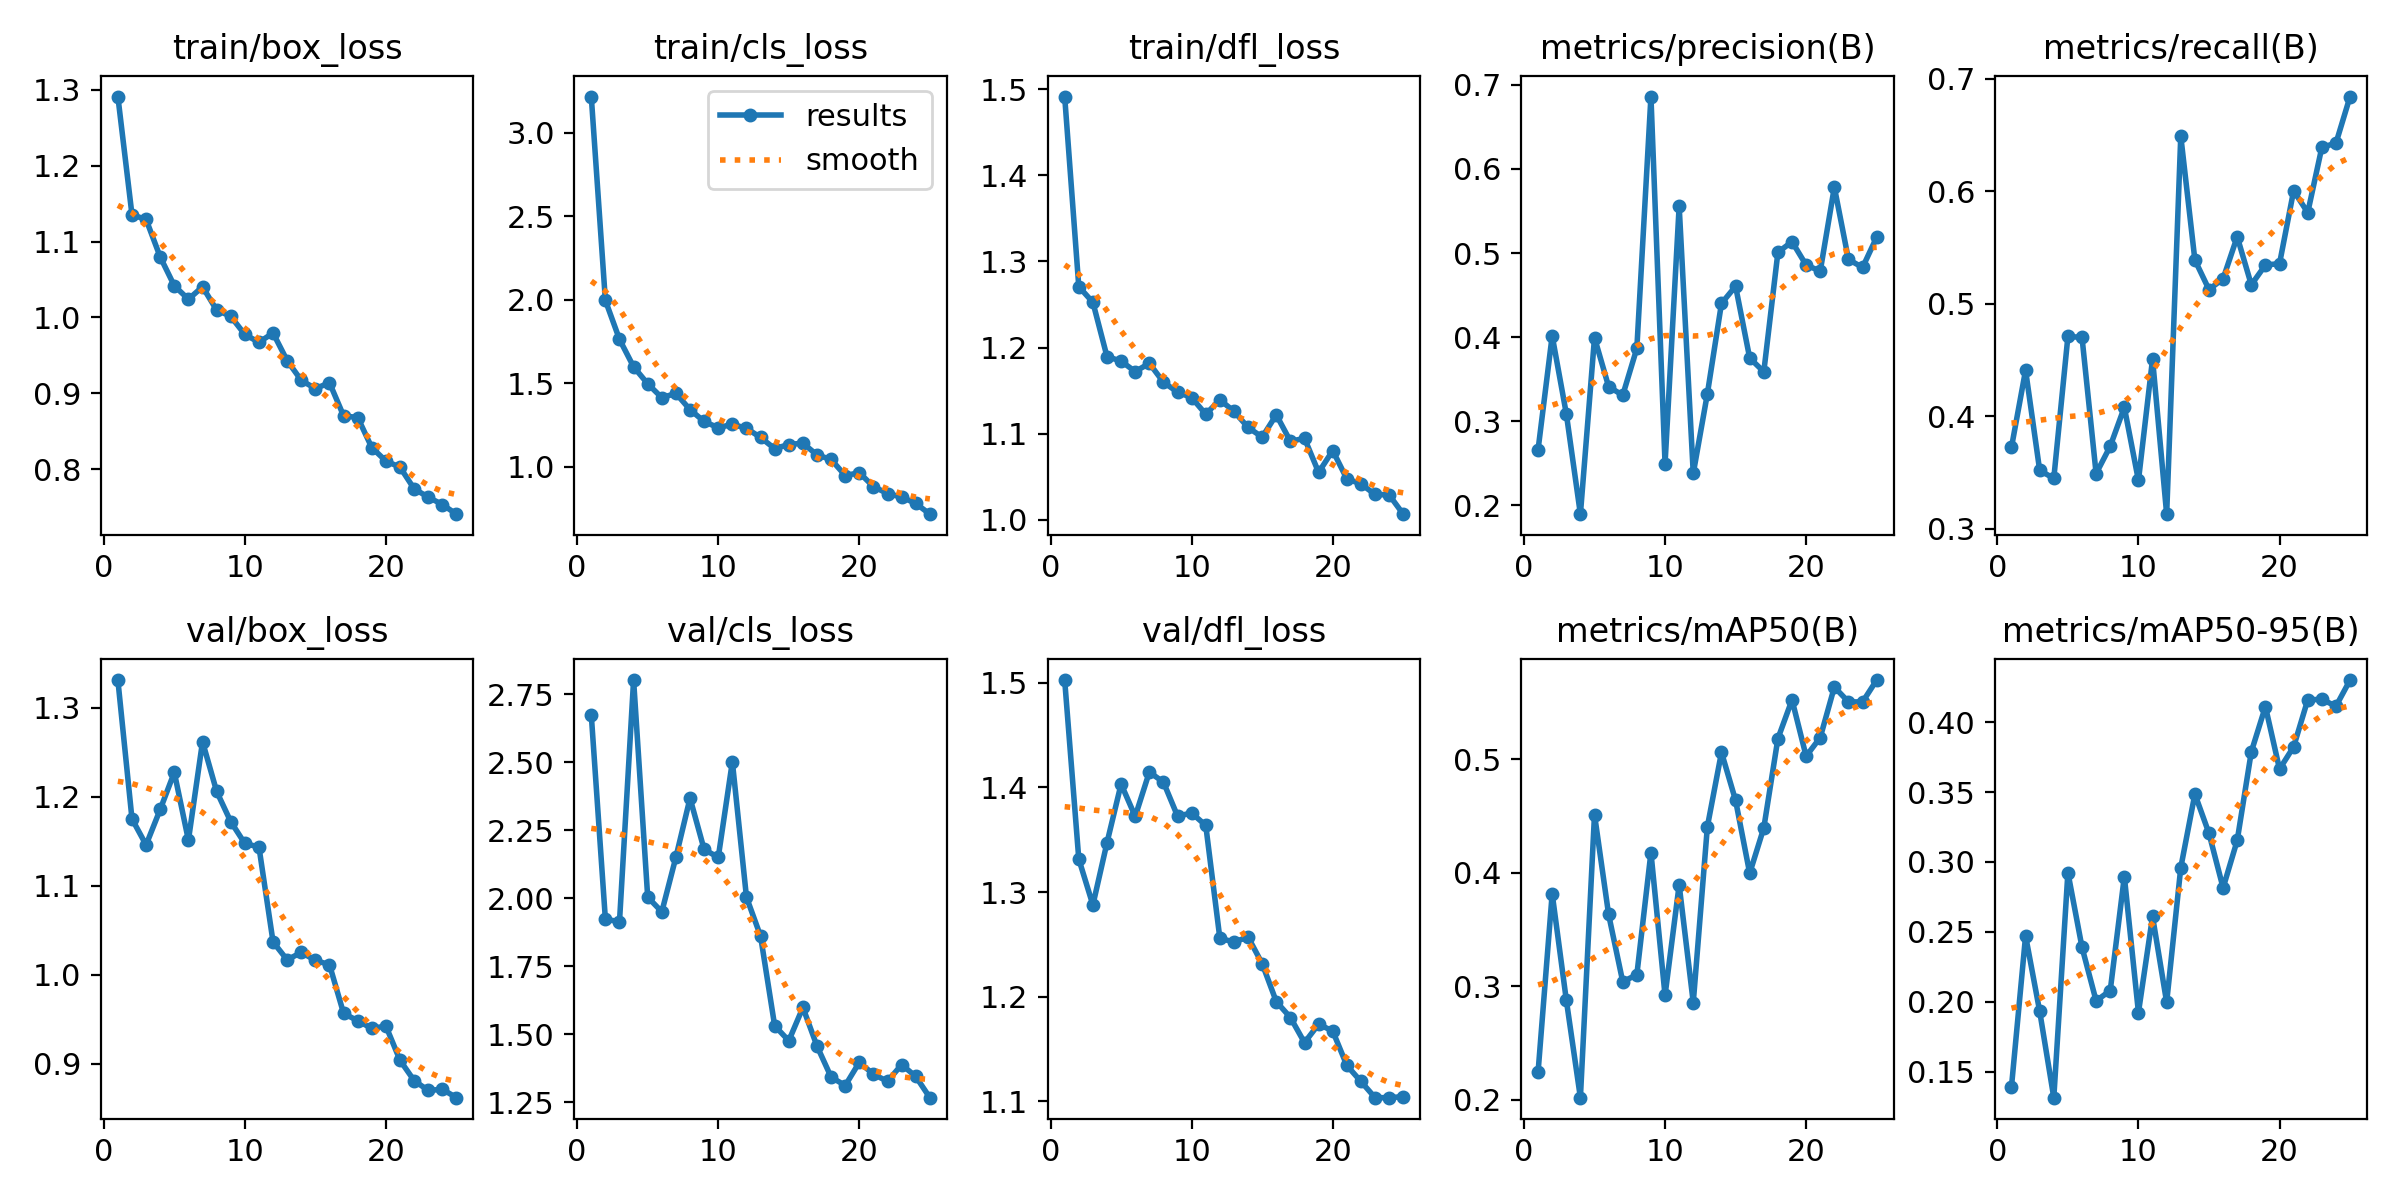

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.02402            0.56010           0.16973   
1                0.02739            0.62250           0.18753   
2                0.26439            0.32220           0.20732   
3                0.30886            0.35510           0.26000   
4                0.30707            0.23228           0.19048   
5                0.20497            0.28763           0.19027   
6                0.27169            0.37696           0.27538   
7                0.31134            0.54482           0.41275   
8                0.33702            0.39706           0.26904   
9                0.37673            0.38088           0.29723   
10               0.35914            0.42393           0.28798   
11               0.43336            0.58766           0.46504   
12               0.53791            0.58196           0.53671   
13               0.56434            0.55338           0.55605   
14               0.49806 

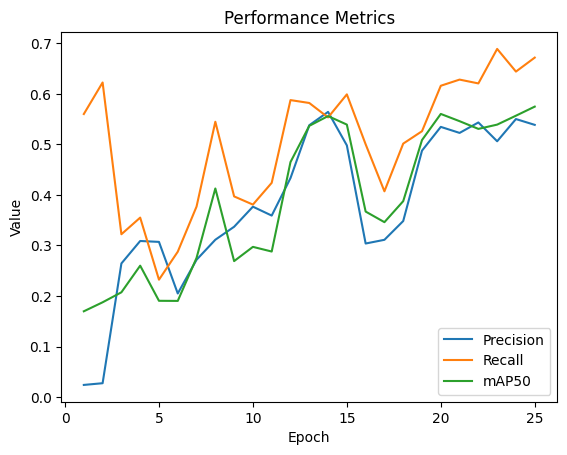

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.read_csv('/content/runs/detect/train/results.csv')

# Display the performance values
print(results_df[['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']])

# Plot some performance metrics
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.legend()
plt.show()

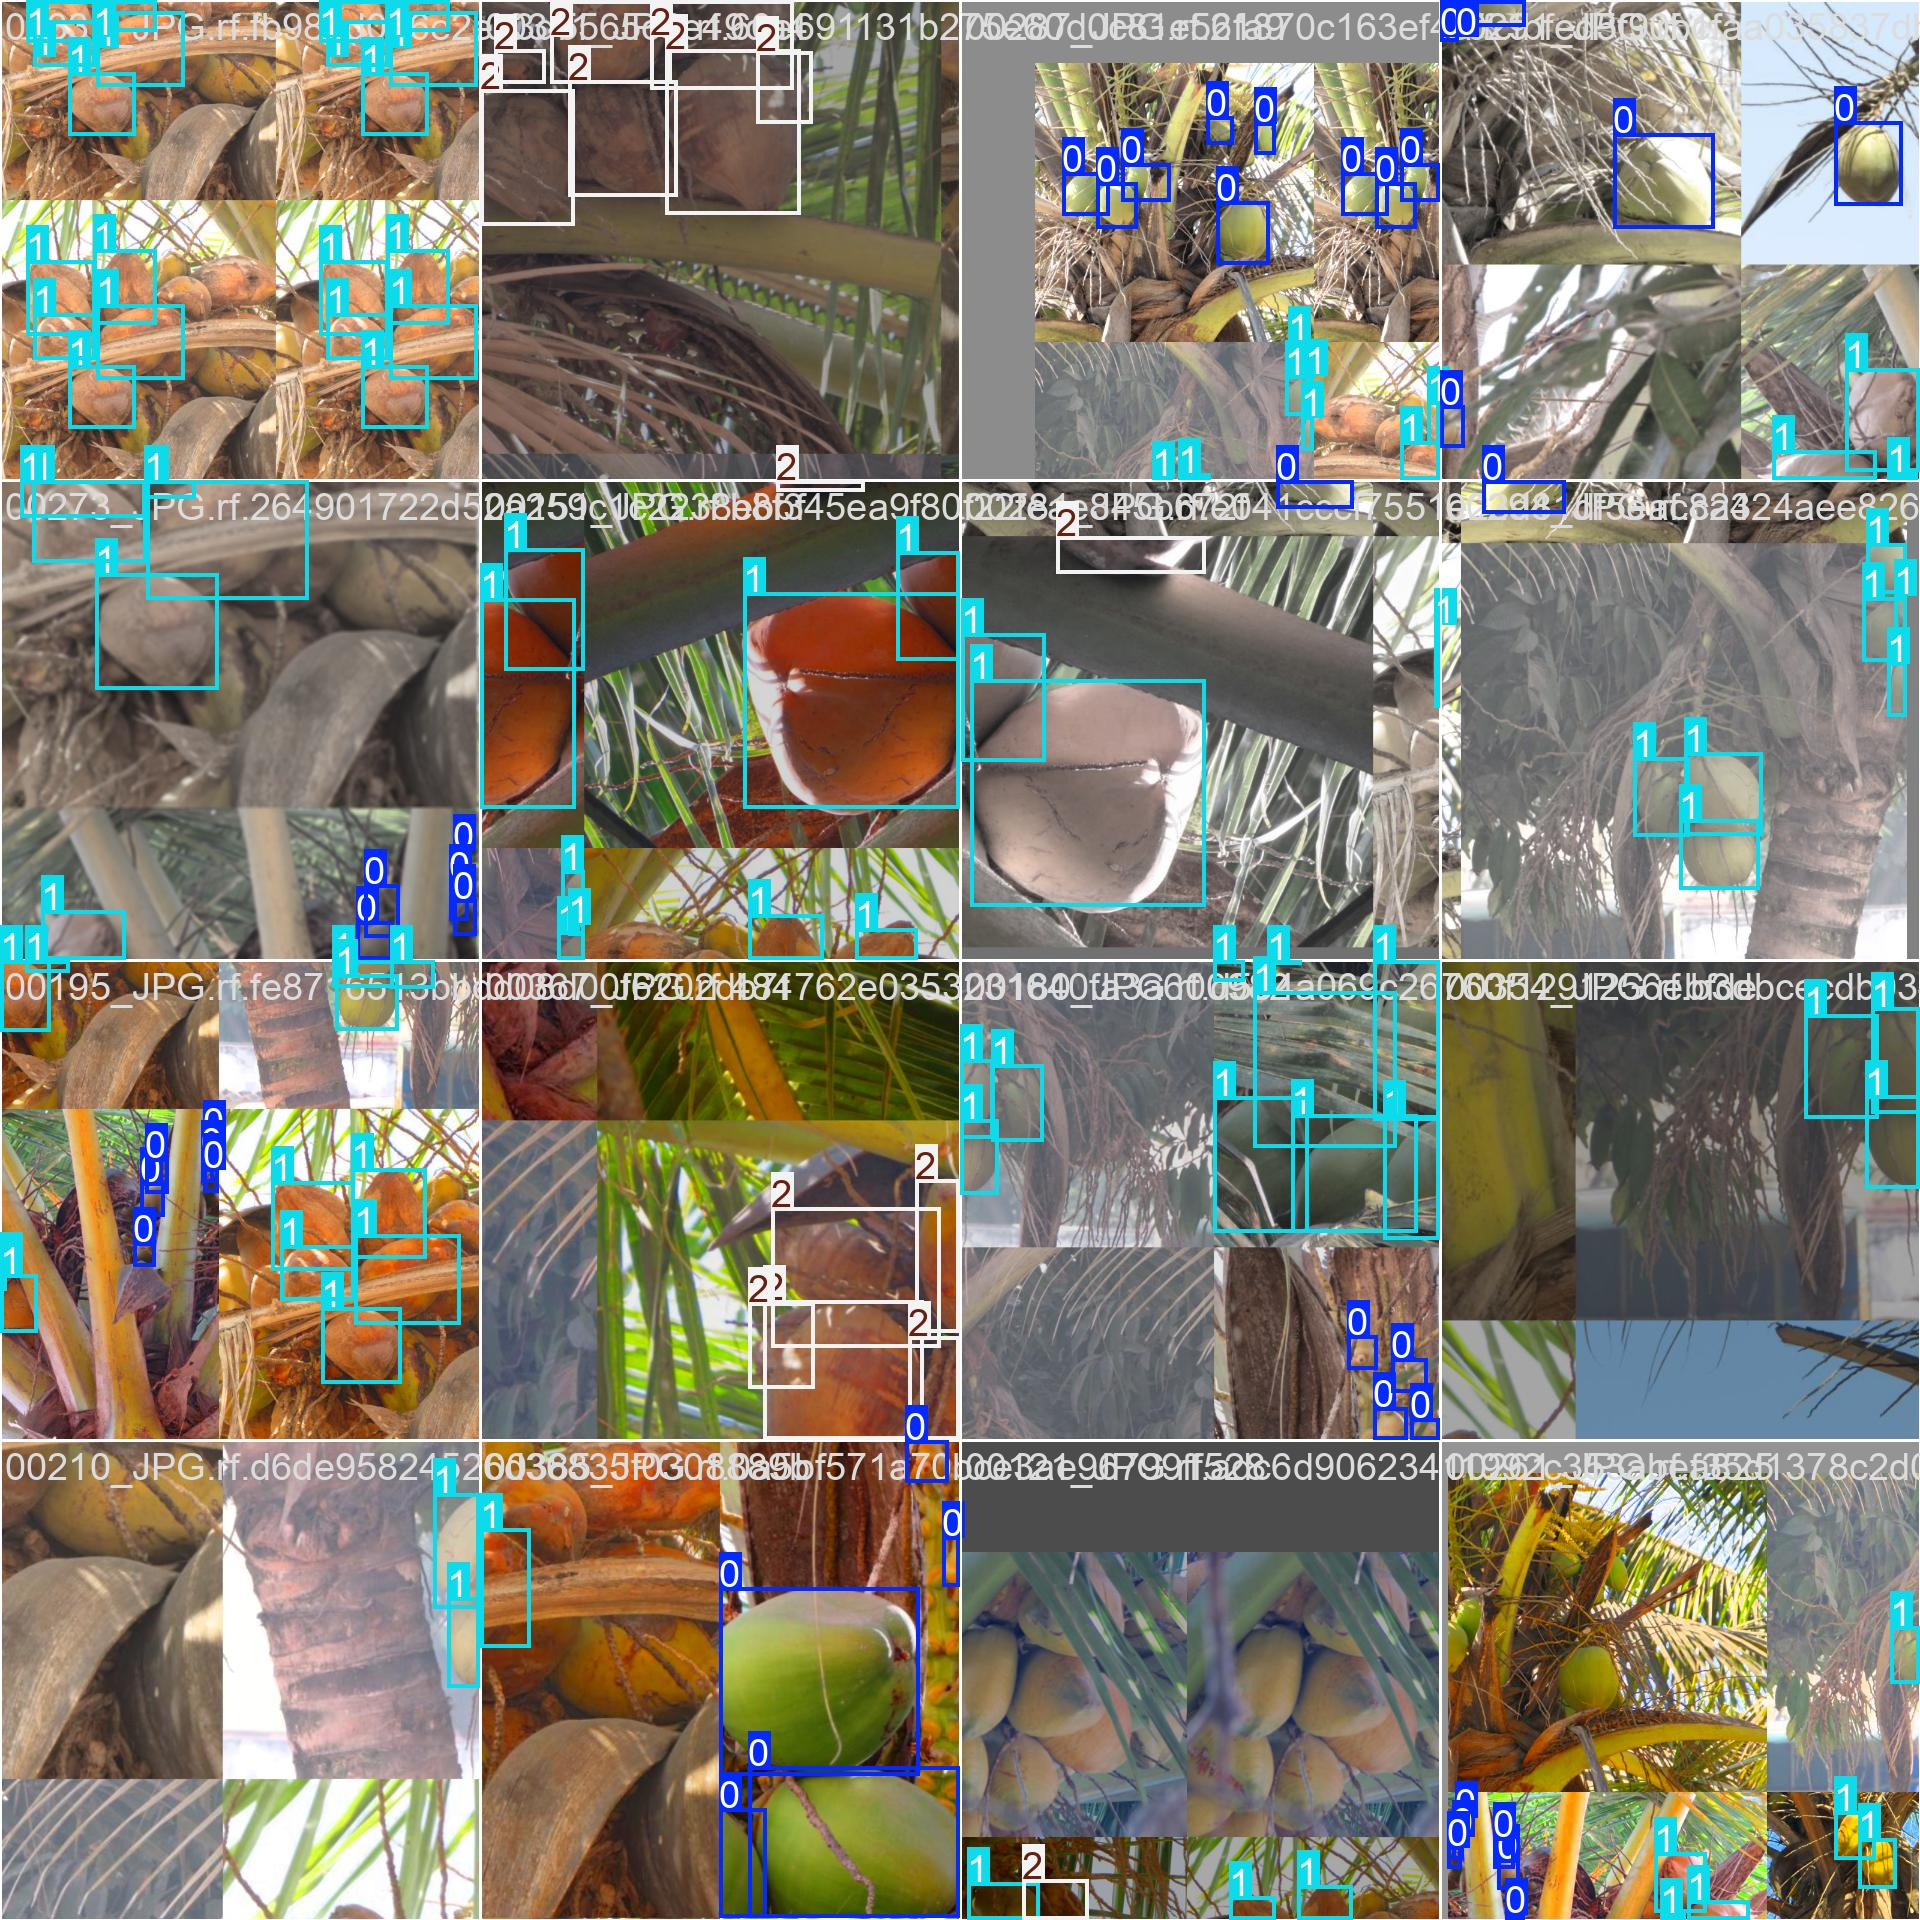

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

**Validate Custom Model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/On-tree-mature-coconut-fruit-detection-1/valid/labels.cache... 53 images, 2 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.01s/it]
                   all         53        559      0.537      0.669      0.575      0.425
                stage1         31        135      0.389      0.437      0.322       0.21
                stage2         40        327       0.63      0.795      0.742      0.576
                stage3         17         97      0.591      0.776       0.66       0.49
Speed: 5.9ms preprocess, 14.8ms inference, 0.0ms loss, 36.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/On-tree-mature-coconut-fruit-detection-1/test/images save=True

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00003_jpg.rf.685ee7b127bd0896095d95bc5b656151.jpg: 800x800 7 stage2s, 10.3ms
image 2/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00011_jpg.rf.b959217cc39f290e6ec84f3187dd4959.jpg: 800x800 7 stage2s, 8.0ms
image 3/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00118_JPG.rf.c865049fcc80421b09821291ea49eca1.jpg: 800x800 1 stage2, 18 stage3s, 7.5ms
image 4/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00141_JPG.rf.662e9406ebdd8691a54bbbd9799131fb.jpg: 800x800 3 stage2s, 2 stage3s, 7.4ms
image 5/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00147_JPG.rf.031898d565a1d103eb5e253d77e202da.jpg: 800x800 11 stage3s, 7.1ms
image 6/28 /content/On-tree-mature-coconut-fruit-detection-1/test/

In [ ]:
!pip install cv

In [ ]:
import cv2
import numpy as np

def count_coconuts_in_image(image_path):
# Load the image using OpenCV
  img = cv2.imread(image_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to reduce noise
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  # Perform Canny edge detection to find edges in the image
  edges = cv2.Canny(blurred, 50, 150)

  # Find contours in the edge-detected image
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Initialize the count of coconuts
  coconut_count = 0

  # Loop through the detected contours
  for contour in contours:
    # Approximate the contour with a polygon
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    # Check if the contour is roughly circular (indicating a coconut)
    if len(approx) >= 6 and cv2.contourArea(contour) > 100:
      coconut_count += 1

  return coconut_count


# Example usage
image_path = '/content/runs/detect/predict/00196_JPG.rf.4a2ad7568e92ff8d1260ab68074f3037.jpg'  # Replace with your image path
coconut_count = count_coconuts_in_image(image_path)
print("Number of coconuts detected:", coconut_count)

Number of coconuts detected: 30


**Kalman Filter for Fruit Tracking**

In [ ]:
class KalmanFilter:
    def __init__(self, dt=1):
        # State vector [x, y, vx, vy]
        self.x = np.zeros((4, 1))
        # Transition matrix
        self.F = np.array([[1, 0, dt, 0],
                           [0, 1, 0, dt],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])
        # Measurement matrix
        self.H = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0]])
        # Covariance matrices
        self.P = np.eye(4) * 1000  # Initial covariance matrix
        self.R = np.eye(2) * 0.01  # Measurement noise
        self.Q = np.eye(4)         # Process noise

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        # Reshape z to a column vector (2, 1)
        z = z.reshape(-1, 1)
        y = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x += np.dot(K, y)
        I = np.eye(self.F.shape[1])
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
        return self.x

# Example usage
kf = KalmanFilter()
initial_detection = np.array([200, 100])  # Example detected fruit position
kf.update(initial_detection)
predicted_position = kf.predict()

**Hungarian Algorithm for Optimal Assignment**

In [ ]:
from scipy.optimize import linear_sum_assignment

def hungarian_assignment(cost_matrix):
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    return row_ind, col_ind

# Example of cost matrix
cost_matrix = np.array([[0.1, 0.2, 0.3],
                        [0.4, 0.5, 0.6],
                        [0.7, 0.8, 0.9]])

row_ind, col_ind = hungarian_assignment(cost_matrix)
print(f"Optimal assignments: {list(zip(row_ind, col_ind))}")


Optimal assignments: [(0, 2), (1, 1), (2, 0)]


**Combine YOLO, Kalman Filter, and Hungarian Algorithm**

In [ ]:
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    kalman_filters = []
    track_ids = []
    next_id = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Step 1: Detect fruits using YOLO
        detected_fruits = detect_fruit(frame)

        # Step 2: Predict the fruit locations with Kalman Filter
        predicted_fruits = []
        for kf in kalman_filters:
            predicted_fruits.append(kf.predict()[:2].flatten())

        # Step 3: Build cost matrix (Euclidean distance) and assign fruits
        if len(predicted_fruits) > 0 and len(detected_fruits) > 0:
            cost_matrix = np.zeros((len(predicted_fruits), len(detected_fruits)))
            for i, pred in enumerate(predicted_fruits):
                for j, (box, _) in enumerate(detected_fruits):
                    dist = np.linalg.norm(pred - np.array([box[0], box[1]]))
                    cost_matrix[i, j] = dist

            row_ind, col_ind = hungarian_assignment(cost_matrix)
            for r, c in zip(row_ind, col_ind):
                kalman_filters[r].update(np.array([detected_fruits[c][0][0], detected_fruits[c][0][1]]))

        # Step 4: Add new fruits that are unassigned
        unassigned_fruits = set(range(len(detected_fruits))) - set(col_ind)
        for u in unassigned_fruits:
            kf = KalmanFilter()
            kf.update(np.array([detected_fruits[u][0][0], detected_fruits[u][0][1]]))
            kalman_filters.append(kf)
            track_ids.append(next_id)
            next_id += 1

        # Visualize tracking on frame
        for i, kf in enumerate(kalman_filters):
            x, y = kf.x[0], kf.x[1]
            cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 0), 2)
            cv2.putText(frame, f"ID: {track_ids[i]}", (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Show video frame
        cv2.imshow("Tracking", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
process_video("fruit_video.mp4")
